### This script computes bias in ACCESS-CM2 ocean evaporation, compared to an observation-based reference.

In [1]:
import xarray as xr
import glob
import cartopy.feature as cft
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.gridspec as gridspec
import numpy as np

Find climatology of observations of latent heat flux from IFREMER v4.1

In [ ]:
# Compute the observed annual climatology 
#  Run through queue.

dir_data='/g/data/gb02/cxh603/Data/IFREMER/'
dir_out='/g/data/gb02/cxh603/Data/IFREMER/regrid/'
# infiles=${dir_data}ifremerfluxv4.1_monthly-*15120000-OHF-L4-global_monthly_0.25x0.25-v0.7-f01.0.nc
# outfile=${dir_data}ifremerfluxv4.1_monthly-15120000-OHF-L4-global_monthly_0.25x0.25-v0.7-f01.0_annual_mean.nc
# ! cdo ensmean $infiles $outfile  

# Regrid the observations to the model grid, one file for each month's climatology

# ! cdo griddes /g/data/lg87/wgh581/cz861/history/atm/netCDF/cz861a.pd0001jan.nc > ${dir_out}target_grid
# ! cdo remapcon,${dir_out}target_grid ${dir_data}ifremerfluxv4.1_monthly-${month}15120000-OHF-L4-global_monthly_0.25x0.25-v0.7-f01.0_mean.nc ${dir_out}ifremerfluxv4.1_monthly-${month}15120000-OHF-L4-global_monthly_0.25x0.25-v0.7-f01.0_mean_regrid_ACCESS_CM2.nc

Plot observed annual mean

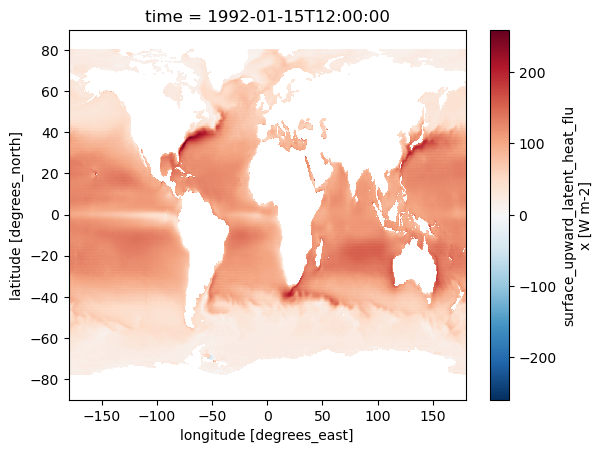

In [12]:
fh = xr.open_dataset('/g/data/gb02/cxh603/Data/IFREMER/ifremerfluxv4.1_monthly-15120000-OHF-L4-global_monthly_0.25x0.25-v0.7-f01.0_annual_mean.nc')
fh.surface_upward_latent_heat_flux.plot()

Find climatology of latent heat flux simulated with ACCESS-CM2, 0.25deg

In [3]:
# Find overall annual average of model data using last 100yrs of the simulation

dir_data='/g/data/lg87/wgh581/cz861/history/atm/netCDF/'
dir_out='/g/data/gb02/cxh603/Wilma/'

# infiles=${dir_data}cz861a.pm04*.nc
# outfile=${dir_out}cz861a.pm0400_0499_annual_mean.nc
# ! cdo select,name=fld_s03i234 $infiles ${dir_out}temp1.nc
# ! cdo timmean ${dir_out}temp1.nc $outfile

Plot modelled annual mean

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/indexing.py:525: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


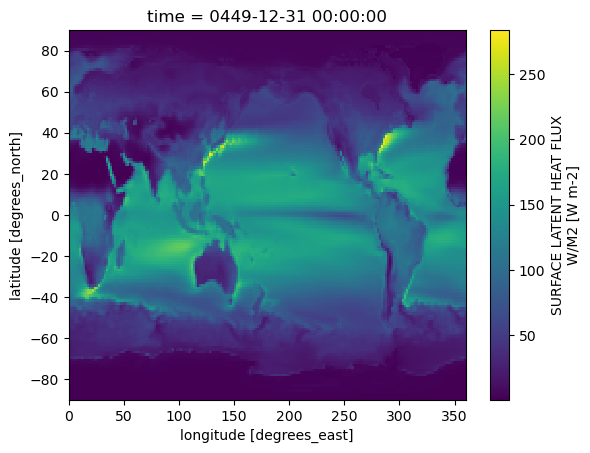

In [4]:
fh = xr.open_dataset(dir_out+'cz861a.pm0400_0499_annual_mean.nc')
fh.fld_s03i234.plot()

Find climatology of latent heat flux simulated with ACCESS-CM2, 1deg

In [5]:
# Find overall annual average of model data using last 100yrs of the simulation

dir_data='/g/data/p73/archive/non-CMIP/ACCESS-CM2/bz687/history/atm/netCDF/'
dir_out='/g/data/gb02/cxh603/Wilma/'

# infiles=${dir_data}bz687a.pm04*.nc
# outfile=${dir_out}bz687a.pm0400_0499_annual_mean.nc
# ! cdo select,name=fld_s03i234 $infiles ${dir_out}temp1.nc
# ! cdo timmean ${dir_out}temp1.nc $outfile >> submit to queue

In [2]:
'''
Convert monthly average latent heat flux [W/m2] to daily evaporation [mm/day].
'''

def monthly_lhf_to_daily_evap(data):

    Lv = 2.25E6 # J/kg
    rho = 1000 # kg/m3 assuming constant density of water

    evap = data * (60*60*24) * (1/Lv) * (1/rho) * 1000  # mm/day

    return evap

    

### Plotting

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/indexing.py:525: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, 

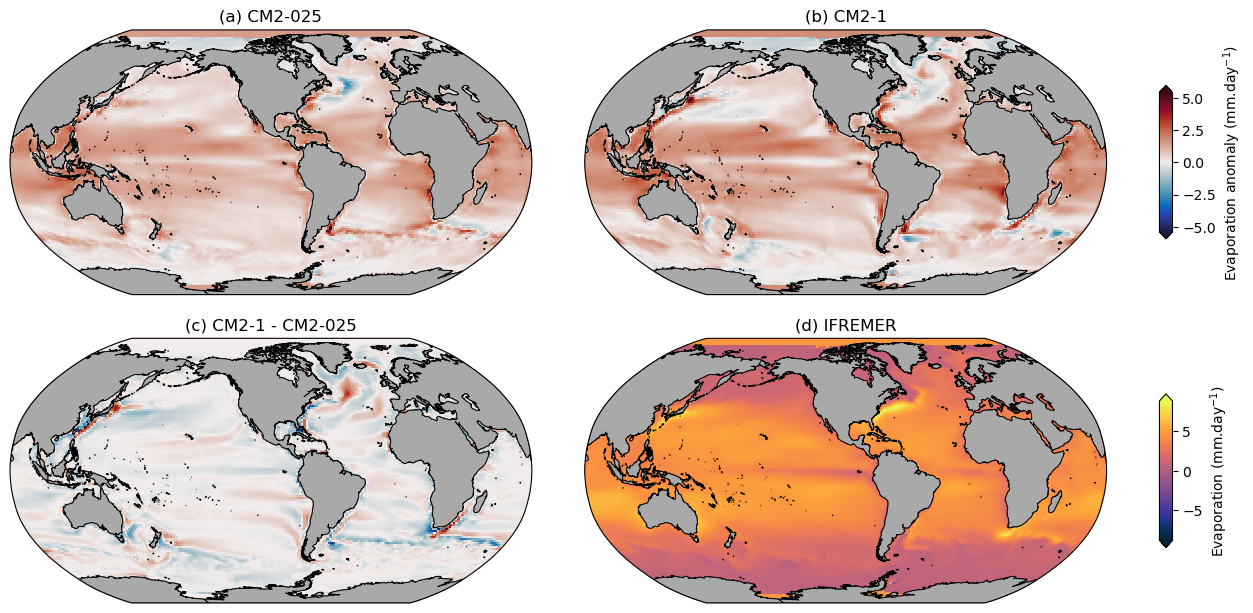

In [11]:
fig_path = '/g/data/gb02/cxh603/Wilma/Figures/'


# Observations 
lh_obs = xr.open_dataset('/g/data/gb02/cxh603/Data/IFREMER/regrid/ifremerfluxv4.1_monthly-15120000-OHF-L4-global_monthly_0.25x0.25-v0.7-f01.0_annual_mean_regrid_ACCESS_CM2_025.nc').surface_upward_latent_heat_flux.squeeze()
lh_obs_evap = monthly_lhf_to_daily_evap(lh_obs)

# Modelled at 0.25deg
lh_mod_025 = xr.open_dataset('/g/data/gb02/cxh603/Wilma/cz861a.pm0400_0499_annual_mean.nc').fld_s03i234.squeeze()
lh_mod_025_evap = monthly_lhf_to_daily_evap(lh_mod_025)

# Modelled at 1deg but regridded to 0.25deg
lh_mod_1 = xr.open_dataset('/g/data/gb02/cxh603/Wilma/bz687a.pm0400_0499_annual_mean_regrid_ACCESS_CM2_025.nc').fld_s03i234.squeeze()
lh_mod_1_evap = monthly_lhf_to_daily_evap(lh_mod_1)

# Difference between simmulations at different resolutions
mod_diff = lh_mod_1_evap - lh_mod_025_evap

# Difference between observations and model 025deg
lh_mod_025_anom = lh_mod_025_evap - lh_obs_evap

# Difference between observations and model 1deg
lh_mod_1_anom = lh_mod_1_evap - lh_obs_evap


land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='darkgrey', linewidth=0.5)

fig = plt.figure(figsize=(15,8))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.01, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = lh_mod_025_anom.plot(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap=cm.cm.balance, add_colorbar=False) #
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(a) CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
sc = lh_mod_1_anom.plot(x='lon', y='lat', transform=ccrs.PlateCarree(),  cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(b) CM2-1')

cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='Evaporation anomaly (mm.day$^{-1}$)', extend='both')

ax = fig.add_subplot(gs[4:,0], projection=ccrs.Robinson(central_longitude=-100))
sc = mod_diff.plot(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(c) CM2-1 - CM2-025')

ax = fig.add_subplot(gs[4:,1], projection=ccrs.Robinson(central_longitude=-100))
sc = lh_obs_evap.plot(x='lon', y='lat', transform=ccrs.PlateCarree(),  cmap=cm.cm.thermal, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(d) IFREMER')
cbar_ax = fig.add_subplot(gs[5:7, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='Evaporation (mm.day$^{-1}$)', extend='both')


# Finished
fig_name = 'evaporation_fig.png'
plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight', facecolor='white');



In [79]:
# Print the min, max, mean of anomalies in a latitudinal range of interest

min_lat, max_lat = -60, 60
print('\n'+str(max_lat)+'deg to '+str(min_lat)+'-deg')

minn = lh_mod_025_anom.sel(lat=slice(min_lat, max_lat)).min().values
maxx = lh_mod_025_anom.sel(lat=slice(min_lat, max_lat)).max().values
meann = lh_mod_025_anom.sel(lat=slice(min_lat, max_lat)).mean().values
print('0.25deg:',format(minn, '.1f'), format(maxx, '.1f'), format(meann, '.1f'))

minn = lh_mod_1_anom.sel(lat=slice(min_lat, max_lat)).min().values
maxx = lh_mod_1_anom.sel(lat=slice(min_lat, max_lat)).max().values
meann = lh_mod_1_anom.sel(lat=slice(min_lat, max_lat)).mean().values
print('1deg:',format(minn, '.1f'), format(maxx, '.1f'), format(meann, '.1f'))

minn = mod_diff.sel(lat=slice(min_lat, max_lat)).min().values
maxx = mod_diff.sel(lat=slice(min_lat, max_lat)).max().values
meann = mod_diff.sel(lat=slice(min_lat, max_lat)).mean().values
print('mod_diff:',format(minn, '.1f'), format(maxx, '.1f'), format(meann, '.1f'))

min_lat, max_lat = -60, -50
print('\n'+str(max_lat)+'deg to '+str(min_lat)+'-deg')

minn = lh_mod_025_anom.sel(lat=slice(min_lat, max_lat)).min().values
maxx = lh_mod_025_anom.sel(lat=slice(min_lat, max_lat)).max().values
meann = lh_mod_025_anom.sel(lat=slice(min_lat, max_lat)).mean().values
print('0.25deg:',format(minn, '.1f'), format(maxx, '.1f'), format(meann, '.1f'))

minn = lh_mod_1_anom.sel(lat=slice(min_lat, max_lat)).min().values
maxx = lh_mod_1_anom.sel(lat=slice(min_lat, max_lat)).max().values
meann = lh_mod_1_anom.sel(lat=slice(min_lat, max_lat)).mean().values
print('1deg:',format(minn, '.1f'), format(maxx, '.1f'), format(meann, '.1f'))

minn = mod_diff.sel(lat=slice(min_lat, max_lat)).min().values
maxx = mod_diff.sel(lat=slice(min_lat, max_lat)).max().values
meann = mod_diff.sel(lat=slice(min_lat, max_lat)).mean().values
print('mod_diff:',format(minn, '.1f'), format(maxx, '.1f'), format(meann, '.1f'))

min_lat, max_lat = 50, 60
print('\n'+str(max_lat)+'deg to '+str(min_lat)+'-deg')

minn = lh_mod_025_anom.sel(lat=slice(min_lat, max_lat)).min().values
maxx = lh_mod_025_anom.sel(lat=slice(min_lat, max_lat)).max().values
meann = lh_mod_025_anom.sel(lat=slice(min_lat, max_lat)).mean().values
print('0.25deg:',format(minn, '.1f'), format(maxx, '.1f'), format(meann, '.1f'))

minn = lh_mod_1_anom.sel(lat=slice(min_lat, max_lat)).min().values
maxx = lh_mod_1_anom.sel(lat=slice(min_lat, max_lat)).max().values
meann = lh_mod_1_anom.sel(lat=slice(min_lat, max_lat)).mean().values
print('1deg:',format(minn, '.1f'), format(maxx, '.1f'), format(meann, '.1f'))

minn = mod_diff.sel(lat=slice(min_lat, max_lat)).min().values
maxx = mod_diff.sel(lat=slice(min_lat, max_lat)).max().values
meann = mod_diff.sel(lat=slice(min_lat, max_lat)).mean().values
print('mod_diff:',format(minn, '.1f'), format(maxx, '.1f'), format(meann, '.1f'))



60deg to -60-deg
0.25deg: -5.3 6.5 0.9
1deg: -5.3 5.4 0.8
mod_diff: -4.6 4.1 -0.1

-50deg to -60-deg
0.25deg: -1.3 1.7 0.4
1deg: -1.4 2.0 0.4
mod_diff: -1.1 1.3 -0.0

60deg to 50-deg
0.25deg: -2.3 1.6 0.3
1deg: -1.5 1.8 0.2
mod_diff: -1.3 1.8 -0.1


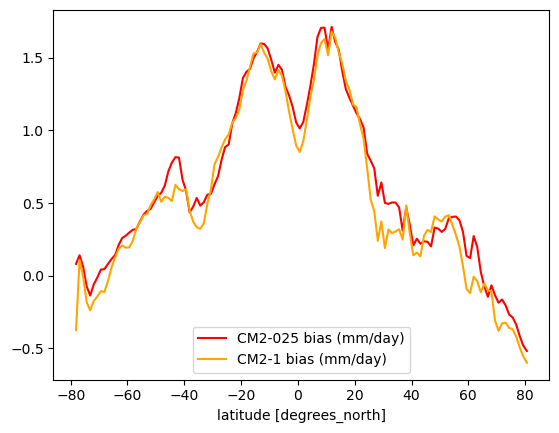

In [12]:
lh_mod_025_anom.mean(dim='lon').plot(color='r',label='CM2-025 bias (mm/day)')
lh_mod_1_anom.mean(dim='lon').plot(color='orange',label='CM2-1 bias (mm/day)')
plt.legend()

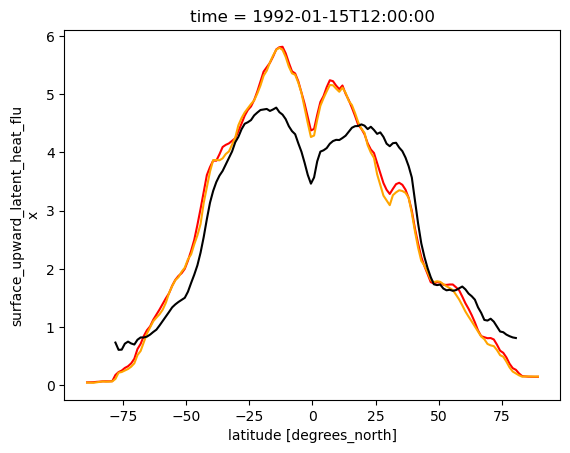

In [9]:
lh_mod_025_evap.mean(dim='lon').plot(color='r')
lh_mod_1_evap.mean(dim='lon').plot(color='orange')
lh_obs_evap.mean(dim='lon').plot(color='k')